In [1]:
from manager import ModelManager
from tables import Cells, Model_Waveforms, Models
from pandas import DataFrame
import numpy as np
import pandas
from matplotlib import pyplot as plt

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 20)

In [2]:
mgr = ModelManager()
mgr.server.connect()

Connecting to server...
Connecting to MySQL database...


In [3]:
# Assess frequency filtering properties

ramp_waves = list(Model_Waveforms\
    .select(Cells.Model_ID)\
    .join(Cells, on=(Cells.Model_ID == Model_Waveforms.Model_id))\
    .where((Model_Waveforms.Protocol == "RAMP") & (Model_Waveforms.Variable_Name == "Voltage"))\
    .order_by(Cells.Model_ID, Model_Waveforms.ID)\
             .dicts()
            
)
df_ramp = DataFrame(ramp_waves)#np.array(prop_names)[(np.array([11, 23, 24, 33]),)]
df_ramp

ramp_cell_ids = df_ramp['Model_ID']

In [4]:
cell_first_ramp_aps = {}

In [5]:
def get_ramp_spike(id):
    from neuronunit.neuromldb import NeuroMLDBStaticModel
    from neuronunit.tests.druckmann2013 import RampFirstSpikeTest

    model = NeuroMLDBStaticModel(id)
    test = RampFirstSpikeTest(None)
    pred = test.generate_prediction(model)['mean']
    
    print(id, pred)
    
    if pred is not None:
        first_spike = float(pred)    
    else:
        first_spike = 5000.0
        
    return first_spike
    


In [6]:
from multiprocessing import Pool
pool = Pool(maxtasksperchild=1)
cell_ramp_spikes = pool.map(get_ramp_spike, ramp_cell_ids)

(u'NMLCL000216', array(3220.84) * ms)
(u'NMLCL000254', array(3085.5) * ms)
(u'NMLCL000001', array(3109.81) * ms)
(u'NMLCL000273', array(3023.98) * ms)
(u'NMLCL000292', array(3022.93) * ms)
(u'NMLCL000330', array(3040.67) * ms)
(u'NMLCL000235', array(3081.32) * ms)
(u'NMLCL000178', array(3079.1) * ms)
(u'NMLCL000159', array(3074.13) * ms)
(u'NMLCL000368', array(3077.79) * ms)
(u'NMLCL000102', array(3057.43) * ms)
(u'NMLCL000197', array(3220.09) * ms)
(u'NMLCL000121', array(3050.26) * ms)
(u'NMLCL000140', array(3076.3) * ms)
(u'NMLCL000349', array(3064.36) * ms)
(u'NMLCL000311', array(3053.73) * ms)
(u'NMLCL000255', array(3061.72) * ms)
(u'NMLCL000217', array(3115.57) * ms)
(u'NMLCL000002', array(2139.19) * ms)
(u'NMLCL000274', array(3071.32) * ms)
(u'NMLCL000331', array(3039.02) * ms)
(u'NMLCL000236', array(3062.42) * ms)
(u'NMLCL000179', array(3117.39) * ms)
(u'NMLCL000293', array(3024.56) * ms)
(u'NMLCL000160', array(3041.72) * ms)
(u'NMLCL000369', array(3046.23) * ms)
(u'NMLCL000122'

(u'NMLCL000153', array(3062.29) * ms)
(u'NMLCL000134', array(3036.71) * ms)
(u'NMLCL000285', array(3040.82) * ms)
(u'NMLCL000115', array(3053.83) * ms)
(u'NMLCL000097', array(3045.78) * ms)
(u'NMLCL000230', array(3059.33) * ms)
(u'NMLCL000363', array(3808.46) * ms)
(u'NMLCL000306', array(3054.95) * ms)
(u'NMLCL000268', array(3107.9) * ms)
(u'NMLCL000192', array(3048.54) * ms)
(u'NMLCL000324', array(3102.93) * ms)
(u'NMLCL000382', array(3035.52) * ms)
(u'NMLCL000210', array(3075.95) * ms)
(u'NMLCL000344', array(3026.96) * ms)
(u'NMLCL000173', array(3047.02) * ms)
(u'NMLCL000154', array(3043.33) * ms)
(u'NMLCL000135', array(3029.8) * ms)
(u'NMLCL000286', array(3028.25) * ms)
(u'NMLCL000116', array(3051.25) * ms)
(u'NMLCL000098', array(3056.55) * ms)
(u'NMLCL000231', array(3055.78) * ms)
(u'NMLCL000307', array(3041.42) * ms)
(u'NMLCL000269', array(3065.12) * ms)
(u'NMLCL000193', array(3049.39) * ms)
(u'NMLCL000364', array(3061.74) * ms)
(u'NMLCL000325', array(3060.91) * ms)
(u'NMLCL000383

(u'NMLCL000490', array(3142.44) * ms)
(u'NMLCL000528', array(3129.8) * ms)
(u'NMLCL000547', array(3128.83) * ms)
(u'NMLCL000396', array(3036.37) * ms)
(u'NMLCL000660', array(3027.07) * ms)
(u'NMLCL000641', array(3090.96) * ms)
(u'NMLCL000585', array(3082.63) * ms)
(u'NMLCL000415', array(3045.8) * ms)
(u'NMLCL000604', array(3064.29) * ms)
(u'NMLCL000679', array(3059.97) * ms)
(u'NMLCL000565', array(3096.47) * ms)
(u'NMLCL000453', array(3064.93) * ms)
(u'NMLCL000623', array(3107.26) * ms)
(u'NMLCL000472', array(3117.68) * ms)
(u'NMLCL000434', array(3048.83) * ms)
(u'NMLCL000510', array(3085.54) * ms)
(u'NMLCL000491', array(3056.7) * ms)
(u'NMLCL000529', array(3106.71) * ms)
(u'NMLCL000548', array(3081.56) * ms)
(u'NMLCL000397', array(3077.6) * ms)
(u'NMLCL000642', array(3055.77) * ms)
(u'NMLCL000661', array(3021.21) * ms)
(u'NMLCL000586', array(3117.85) * ms)
(u'NMLCL000416', array(3032.56) * ms)
(u'NMLCL000605', array(3058.87) * ms)
(u'NMLCL000680', array(3052.18) * ms)
(u'NMLCL000566',

(u'NMLCL000770', array(3134.13) * ms)
(u'NMLCL000864', array(3071.91) * ms)
(u'NMLCL000883', array(3105.35) * ms)
(u'NMLCL000789', array(3102.08) * ms)
(u'NMLCL000808', array(3112.47) * ms)
(u'NMLCL000921', array(3131.81) * ms)
(u'NMLCL000750', array(3021.53) * ms)
(u'NMLCL000827', array(3124.47) * ms)
(u'NMLCL000902', array(3070.3) * ms)
(u'NMLCL000940', array(3130.78) * ms)
(u'NMLCL000714', array(3028.51) * ms)
(u'NMLCL000846', array(3123.17) * ms)
(u'NMLCL000959', array(3083.36) * ms)
(u'NMLCL000978', array(3106.19) * ms)
(u'NMLCL000733', array(3034.89) * ms)
(u'NMLCL000771', array(3105.13) * ms)
(u'NMLCL000865', array(3076.93) * ms)
(u'NMLCL000884', array(3111.25) * ms)
(u'NMLCL000790', array(3157.65) * ms)
(u'NMLCL000922', array(3133.9) * ms)
(u'NMLCL000809', array(3146.85) * ms)
(u'NMLCL000751', array(3038.1) * ms)
(u'NMLCL000828', array(3165.99) * ms)
(u'NMLCL000903', array(3069.53) * ms)
(u'NMLCL000941', array(3153.27) * ms)
(u'NMLCL000847', array(3094.69) * ms)
(u'NMLCL000715'

(u'NMLCL000784', array(3130.06) * ms)
(u'NMLCL000707', array(3022.61) * ms)
(u'NMLCL000897', array(3165.5) * ms)
(u'NMLCL000858', array(3142.62) * ms)
(u'NMLCL000932', array(3099.93) * ms)
(u'NMLCL000728', array(3027.49) * ms)
(u'NMLCL000822', array(3071.9) * ms)
(u'NMLCL000764', array(3151.04) * ms)
(u'NMLCL000803', array(3129.28) * ms)
(u'NMLCL000973', array(3073.34) * ms)
(u'NMLCL000841', array(3130.2) * ms)
(u'NMLCL000992', array(3108.18) * ms)
(u'NMLCL000916', array(3121.96) * ms)
(u'NMLCL000747', array(3037.32) * ms)
(u'NMLCL000954', array(3095.14) * ms)
(u'NMLCL000708', array(3023.82) * ms)
(u'NMLCL000785', array(3151.75) * ms)
(u'NMLCL000898', array(3175.48) * ms)
(u'NMLCL000859', array(3130.96) * ms)
(u'NMLCL000933', array(3098.41) * ms)
(u'NMLCL000823', array(3125.38) * ms)
(u'NMLCL000765', array(3122.39) * ms)
(u'NMLCL000974', array(3119.75) * ms)
(u'NMLCL000804', array(3161.8) * ms)
(u'NMLCL000842', array(3060.25) * ms)
(u'NMLCL000917', array(3131.08) * ms)
(u'NMLCL000878',

(u'NMLCL001448', array(3147.26) * ms)
(u'NMLCL001121', array(3101.85) * ms)
(u'NMLCL001493', array(2999.13) * ms)
(u'NMLCL001468', array(3062.76) * ms)
(u'NMLCL001063', array(3079.08) * ms)
(u'NMLCL001027', array(3090.98) * ms)
(u'NMLCL001046', array(3085.77) * ms)
(u'NMLCL001083', array(3140.21) * ms)
(u'NMLCL001513', array(3050.87) * ms)
(u'NMLCL001426', array(6286.8) * ms)
(u'NMLCL001103', array(3261.56) * ms)
(u'NMLCL001007', array(3022.67) * ms)
(u'NMLCL001650', array(2948.13) * ms)
(u'NMLCL001147', array(3107.87) * ms)
(u'NMLCL001538', array(3060.72) * ms)
(u'NMLCL001449', array(3265.81) * ms)
(u'NMLCL001123', array(3030.69) * ms)
(u'NMLCL001469', array(3058.92) * ms)
(u'NMLCL001494', array(3048.47) * ms)
(u'NMLCL001064', array(3078.71) * ms)
(u'NMLCL001028', array(3076.37) * ms)
(u'NMLCL001047', array(3075.23) * ms)
(u'NMLCL001084', array(3138.6) * ms)
(u'NMLCL001428', None)
(u'NMLCL001514', array(3040.14) * ms)
(u'NMLCL001104', array(3137.87) * ms)
(u'NMLCL001008', array(3081.5

In [7]:
ramp_spikes = {}
for i, id in enumerate(ramp_cell_ids):
    ramp_spikes[id] = cell_ramp_spikes[i]

In [8]:
protocol_cost = {
    'Steady State':       1, # 1s
    'Standard':         5*2, # 5 repetitions of 1s SS 1s stim
    'Strong':           5*2, # 5 repetitions of 1s SS 1s strong stim
    'Input Resistance': 2*2, # 2 levels of 1s SS 1s stim
}

prop_protocol = {
    'AP1Amplitude': 'Standard',
    'AP2Amplitude': 'Standard',
    'AP12AmplitudeDrop': 'Standard',
    'AP12AmplitudeChangePercent': 'Standard',
    'AP1SSAmplitudeChange': 'Standard'  ,
    
    'AP1WidthHalfHeight': 'Standard',
    'AP2WidthHalfHeight': 'Standard',
    'AP12HalfWidthChangePercent': 'Standard',
    
    'AP1WidthPeakToTrough': 'Standard',
    'AP2WidthPeakToTrough': 'Standard',
    
    'AP1RateOfChangePeakToTrough': 'Standard',
    'AP2RateOfChangePeakToTrough': 'Standard', 
    'AP12RateOfChangePeakToTroughPercentChange': 'Standard',
    
    'AP1AHPDepth': 'Standard',
    'AP2AHPDepth': 'Standard',
    'AP12AHPDepthPercentChange': 'Standard',
    
    'AP1DelayMean': 'Standard',
    'AP2DelayMean': 'Standard',
    
    'AP1DelaySD': 'Standard',
    'AP2DelaySD': 'Standard',
    
    'AP1DelayMeanStrongStim': 'Strong',
    'AP2DelayMeanStrongStim': 'Strong',
    
    'AP1DelaySDStrongStim': 'Strong',
    'AP2DelaySDStrongStim': 'Strong',
    
    'Burst1ISIMean': 'Standard',
    'Burst1ISIMeanStrongStim': 'Strong',
    
    'Burst1ISISD': 'Standard',
    'Burst1ISISDStrongStim': 'Strong',
    
    'InitialAccommodationMean': 'Standard',
    'SSAccommodationMean': 'Standard',
    'AccommodationRateToSS': 'Standard',
    'AccommodationAtSSMean': 'Standard',
    'AccommodationRateMeanAtSS': 'Standard',
    
    
    'ISIMedian': 'Standard',
    'ISICV': 'Standard',
    'ISIBurstMeanChange': 'Standard',
    
    'SpikeRateStrongStim': 'Strong',
    
    'InputResistance': 'Input Resistance',
    
    'SteadyStateAPs': 'Steady State',
}

prop_names = [
    'AP1Amplitude',
    'AP2Amplitude',
    'AP12AmplitudeDrop',
    'AP12AmplitudeChangePercent',
    'AP1SSAmplitudeChange',  
    
    'AP1WidthHalfHeight',
    'AP2WidthHalfHeight',
    'AP12HalfWidthChangePercent',
    
    'AP1WidthPeakToTrough',
    'AP2WidthPeakToTrough',
    
    'AP1RateOfChangePeakToTrough',
    'AP2RateOfChangePeakToTrough',    
    'AP12RateOfChangePeakToTroughPercentChange',
    
    'AP1AHPDepth',
    'AP2AHPDepth',
    'AP12AHPDepthPercentChange',
    
    'AP1DelayMean',
    'AP2DelayMean',
    
    'AP1DelaySD',
    'AP2DelaySD',
    
    'AP1DelayMeanStrongStim',
    'AP2DelayMeanStrongStim',
    
    'AP1DelaySDStrongStim',
    'AP2DelaySDStrongStim',
    
    'Burst1ISIMean',
    'Burst1ISIMeanStrongStim',
    
    'Burst1ISISD',
    'Burst1ISISDStrongStim',
    
    'InitialAccommodationMean',
    'SSAccommodationMean',
    'AccommodationRateToSS',
    'AccommodationAtSSMean',
    'AccommodationRateMeanAtSS',
    
    
    'ISIMedian',
    'ISICV',
    'ISIBurstMeanChange',
    
    'SpikeRateStrongStim',
    
    'InputResistance',
    
    'SteadyStateAPs',
    
    'FFPassAbove',
    'FFPassBelow',
    
    'RampSpikes',
]

In [9]:
# Assess frequency filtering properties

freq_waves = list(Model_Waveforms\
    .select(Cells.Model_ID, Model_Waveforms.Spikes, Model_Waveforms.Waveform_Label)\
    .join(Cells, on=(Cells.Model_ID == Model_Waveforms.Model_id))\
    .where((Model_Waveforms.Protocol == "SHORT_SQUARE_TRIPPLE") & (Model_Waveforms.Variable_Name == "Voltage"))\
    .order_by(Cells.Model_ID, Model_Waveforms.ID)\
             .dicts()
            
)
df_fr = DataFrame(freq_waves)

In [10]:
def constant_func(f, height):
    return f*0+height

def sig_func(f, height, loc, slope):
    return height / (1+np.exp(-slope*(f-loc)))

def hat_func(f, height, loc, width, start, incline):
    return height * (\
        1.0 / (1+np.exp(-incline*(f-loc+width/2.0))) \
       -1.0 / (1+np.exp(-incline*(f-loc-width/2.0))) 
    ) + start

def get_best(models):        
    def err(name):
        if models[name]['result'] is None:
            return 9999
        
        return models[name]['result'].chisqr
    
    def bic(name):
        if models[name]['result'] is None:
            return -9999
        
        return models[name]['result'].bic

    if err('Constant') < 0.01:
        return 'Constant'
    else:
        if err('Low-Pass') < 0.01 or err('High-Pass') < 0.01:
            if err('Low-Pass') < err('High-Pass'):
                return 'Low-Pass'
            else:
                return 'High-Pass'
        else:
            if err('Band-Pass') < 0.01 or err('Band-Stop') < 0.01:
                if err('Band-Pass') < err('Band-Stop'):
                    return 'Band-Pass'
                else:
                    return 'Band-Stop'
            else:
                min_err = np.min([bic(name) for name in models.keys()])
                for name in models.keys():
                    if min_err == bic(name):
                        return name

In [11]:
from lmfit import Model

models = {
    'Constant': { 
        'model': Model(constant_func), 
        'params': None, 
        'result': None 
    },
    'Low-Pass': { 
        'model': Model(sig_func), 
        'params': None, 
        'result': None 
    },
    'High-Pass': { 
        'model': Model(sig_func), 
        'params': None, 
        'result': None 
    },
    'Band-Pass': { 
        'model': Model(hat_func), 
        'params': None, 
        'result': None 
    },
    'Band-Stop': { 
        'model': Model(hat_func), 
        'params': None, 
        'result': None 
    },
}

params = models['Constant']['model'].make_params(height=2.0)
params['height'].min, params['height'].max = (0, 3)
models['Constant']['params'] = params


params = models['High-Pass']['model'].make_params(height=2.0, loc=80.0, slope=1.0)
params['height'].min, params['height'].max = 0, 3
params['loc'].min, params['loc'].max = 0, 200
params['slope'].min, params['slope'].max = 0.01, 100
models['High-Pass']['params'] = params


params = models['Low-Pass']['model'].make_params(height=2.0, loc=80.0, slope=-1.0)
params['height'].min, params['height'].max = 0, 3
params['loc'].min, params['loc'].max = 0, 200
params['slope'].min, params['slope'].max = -100, -0.01
models['Low-Pass']['params'] = params



params = models['Band-Pass']['model'].make_params(height=2.0, loc=60.0, width=100.0, start=0, incline=10.0)
params['height'].min, params['height'].max = 1, 3
params['loc'].min, params['loc'].max = 32, 91
params['width'].min, params['width'].max = 1, 143.0-29.0
params['start'].vary = False
params['incline'].vary = False
models['Band-Pass']['params'] = params


params = models['Band-Stop']['model'].make_params(height=-2.0, loc=60.0, width=100.0, start=3, incline=10.0)
params['height'].min, params['height'].max = -3, -1
params['loc'].min, params['loc'].max = 32, 91
params['width'].min, params['width'].max = 1, 143-29
params['start'].min, params['start'].max = 1, 3
params['incline'].vary = False
models['Band-Stop']['params'] = params

In [12]:
def fit_spikes_freq(id, plot=False):
        cell_rows = df_fr[df_fr['Model_ID'] == id]

        freqs = np.array(cell_rows['Waveform_Label'].apply(lambda row: float(row.replace(' Hz',''))))
        spikes = np.array(cell_rows['Spikes'].apply(lambda row: int(row)))
        spikes = spikes - spikes.min()

        order = ['Constant', 'Low-Pass', 'High-Pass', 'Band-Pass', 'Band-Stop']

        for name in order:
            models[name]['result'] = None

        for name in order:
            model = models[name]['model']
            params = models[name]['params']
            method = 'differential_evolution' #if name in ['Band-Pass', 'Band-Stop'] else 'powell'

            result = model.fit(spikes,f=freqs, params=params, method=method)
            
            result = model.fit(spikes,f=freqs, params=result.params, method="powell")

            models[name]['result'] = result

            if result.chisqr < 0.01:
                if plot:
                    print(id, 'breaking early', result.chisqr, name)
                break

        best = get_best(models)

        if plot:
            plt.plot(freqs, spikes, 'bo')
            plt.plot(freqs, models[best]['result'].best_fit, 'r-')
            plt.ylim(-1,4)
            plt.title(best + ' ' + id)
            plt.show()

            print('Best Model: ', best)
            print(models[best]['result'].fit_report())

        best_result = models[best]['result']

        return { 'id': id, 'best': best, 'err': best_result.chisqr, 'params': best_result.best_values.copy() }

In [13]:
cell_ids = np.unique([w['Model_ID'] for w in freq_waves])

('NMLCL000001', 'breaking early', 2.1580190403773046e-229, 'Low-Pass')


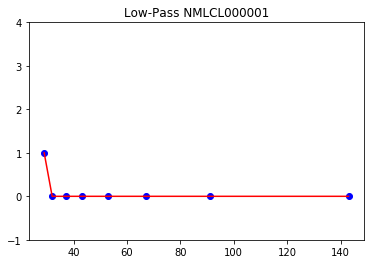

('Best Model: ', 'Low-Pass')
[[Model]]
    Model(sig_func)
[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 59
    # data points      = 8
    # variables        = 3
    chi-square         = 2.158e-229
    reduced chi-square = 4.316e-230
    Akaike info crit   = -4222.81790
    Bayesian info crit = -4222.57957
[[Variables]]
    height:  1.00000000 (init = 1)
    loc:     29.3673860 (init = 29.36872)
    slope:  -100.0000000 (init = -99.99953)



{'best': 'Low-Pass',
 'err': 2.1580190403773046e-229,
 'id': 'NMLCL000001',
 'params': {'height': 1.0,
  'loc': 29.367386021963238,
  'slope': -99.99999999968244}}

In [14]:
fit_spikes_freq('NMLCL000001',True)

In [15]:
from multiprocessing import Pool

pool = Pool(maxtasksperchild=1)

cell_results = pool.map(fit_spikes_freq, cell_ids)

In [16]:
for i, cell in enumerate(cell_results):
    if cell['best'] == 'Constant':
        cell_results[i]['pass_above'] = 29
        cell_results[i]['pass_below'] = 143
    
    if cell['best'] == 'Low-Pass':
        cell_results[i]['pass_above'] = cell['params']['loc']
        cell_results[i]['pass_below'] = 143
    
    if cell['best'] == 'High-Pass':
        cell_results[i]['pass_above'] = 29
        cell_results[i]['pass_below'] = cell['params']['loc']
    
    if cell['best'] == 'Band-Pass':
        loc = cell['params']['loc'] 
        width = cell['params']['width'] 
        cell_results[i]['pass_above'] = loc - width/2.0
        cell_results[i]['pass_below'] = loc + width/2.0
    
    if cell['best'] == 'Band-Stop':
        loc = cell['params']['loc'] 
        width = cell['params']['width'] 
        cell_results[i]['pass_above'] = loc + width/2.0
        cell_results[i]['pass_below'] = loc - width/2.0
        
    cell_results[i]['pass_above'] = min(143, max(29, cell_results[i]['pass_above']))
    cell_results[i]['pass_below'] = min(143, max(29, cell_results[i]['pass_below']))
    

In [17]:
ramp_spikes[cell.Model_ID]

AttributeError: 'dict' object has no attribute 'Model_ID'

In [18]:
# Get the remaining cell properties
cells = list(Cells\
    .select(Cells,Model_Waveforms.Spikes,Models.Name)\
    .join(Model_Waveforms, on=(Cells.Model_ID == Model_Waveforms.Model_id))\
    .join(Models, on=(Cells.Model_ID == Models.Model_ID))\
    .where((Model_Waveforms.Protocol == "STEADY_STATE") & (Model_Waveforms.Variable_Name == "Voltage"))\
    .order_by(Cells.Model_ID)
    .objects()
)

props = {}
for c, cell in enumerate(cells):
    for p, prop in enumerate(prop_names):
        if prop not in props:
            props[prop] = []
        
        if prop == 'SteadyStateAPs':
            props[prop].append(cell.Spikes)
            
        elif prop == 'RampSpikes':
            if cell.Model_ID in ramp_spikes:
                props[prop].append(ramp_spikes[cell.Model_ID])
            else:
                props[prop].append(5000)
            
        elif prop in ['FFPassAbove', 'FFPassBelow']:
            ff_match = [ff for ff in cell_results if ff['id'] == cell.Model_ID]
            
            if len(ff_match) > 0:
                if 'Above' in prop:
                    props[prop].append(ff_match[0]['pass_above'])
                else:
                    props[prop].append(ff_match[0]['pass_below'])
            else:
                props[prop].append(None)
            
        else:
            props[prop].append(getattr(cell, prop))
        
df = DataFrame(props, columns = prop_names)

In [19]:
df['AP1Amplitude'].fillna(0, inplace=True)
df['AP2Amplitude'].fillna(0, inplace=True)

df['AP1SSAmplitudeChange'].fillna(0, inplace=True)

df['AP1WidthHalfHeight'].fillna(0, inplace=True)
df['AP2WidthHalfHeight'].fillna(0, inplace=True)

df['AP1WidthPeakToTrough'].fillna(0, inplace=True)
df['AP2WidthPeakToTrough'].fillna(0, inplace=True)

df['AP1RateOfChangePeakToTrough'].fillna(0, inplace=True)
df['AP2RateOfChangePeakToTrough'].fillna(0, inplace=True)

df['AP1AHPDepth'].fillna(0, inplace=True)
df['AP2AHPDepth'].fillna(0, inplace=True)

df['AP1DelayMean'].fillna(2000, inplace=True)
df['AP2DelayMean'].fillna(2000, inplace=True)

df['AP1DelaySD'].fillna(0, inplace=True)
df['AP2DelaySD'].fillna(0, inplace=True)

df['AP1DelayMeanStrongStim'].fillna(2000, inplace=True)
df['AP2DelayMeanStrongStim'].fillna(2000, inplace=True)

df['AP1DelaySDStrongStim'].fillna(0, inplace=True)
df['AP2DelaySDStrongStim'].fillna(0, inplace=True)

df['Burst1ISIMean'].fillna(2000, inplace=True)
df['Burst1ISIMeanStrongStim'].fillna(2000, inplace=True)

df['Burst1ISISD'].fillna(0, inplace=True)
df['Burst1ISISDStrongStim'].fillna(0, inplace=True)

df['AccommodationRateMeanAtSS'].fillna(2000, inplace=True)

df['ISIMedian'].fillna(2000, inplace=True)

df['ISICV'].fillna(0, inplace=True)

df['ISIBurstMeanChange'].fillna(0, inplace=True)

df['SpikeRateStrongStim'].fillna(0, inplace=True)

df['InputResistance'].fillna(df['InputResistance'].mean(), inplace=True)

df['FFPassAbove'].fillna(29, inplace=True)
df['FFPassBelow'].fillna(143, inplace=True)

for index, row in df.iterrows():
    
    # No APs
    if(row['AP1Amplitude'] == 0 and row['AP2Amplitude'] == 0):
        df.at[index, 'AP12AmplitudeDrop'] = 0
        df.at[index, 'AP12AmplitudeChangePercent'] = 0
        df.at[index, 'AP1SSAmplitudeChange'] = 0
        df.at[index, 'AP12HalfWidthChangePercent'] = 0
        df.at[index, 'AP12RateOfChangePeakToTroughPercentChange'] = 0
        df.at[index, 'AP12AHPDepthPercentChange'] = 0
        df.at[index, 'InitialAccommodationMean'] = 0
        df.at[index, 'SSAccommodationMean'] = 0
        df.at[index, 'AccommodationRateToSS'] = 0
        df.at[index, 'AccommodationAtSSMean'] = 0
        
    # Only 1 AP
    if(row['AP1Amplitude'] > 0 and row['AP2Amplitude'] == 0):
        df.at[index, 'AP12AmplitudeDrop'] = row['AP1Amplitude']
        df.at[index, 'AP12AmplitudeChangePercent'] = -100
        df.at[index, 'AP12HalfWidthChangePercent'] = -100
        df.at[index, 'AP12RateOfChangePeakToTroughPercentChange'] = -100
        df.at[index, 'AP12AHPDepthPercentChange'] = -100
        df.at[index, 'AccommodationRateToSS'] = -1
        df.at[index, 'AccommodationAtSSMean'] = -100
    
    # 1 AP and no SS APs
    if row['AP1SSAmplitudeChange'] == 0 and row['AP1Amplitude'] > 0:
        df.at[index, 'AP1SSAmplitudeChange'] = row['AP1Amplitude']
            
        
    if np.isnan(row['AccommodationRateToSS']):
        df.at[index, 'AccommodationRateToSS'] = -1
        
                
    if np.isnan(row['AccommodationAtSSMean']):
        df.at[index, 'AccommodationAtSSMean'] = -100

In [30]:
df.to_csv('cells_na_filled.csv')

In [21]:
df['AP12AmplitudeDrop'] = df['AP12AmplitudeDrop'].apply(lambda x: np.log(10+x))
df['AP12AmplitudeChangePercent'] = df['AP12AmplitudeChangePercent'].apply(lambda x: np.log(-x+10+np.abs(np.max(df['AP12AmplitudeChangePercent']))))
df['AP1SSAmplitudeChange'] = df['AP1SSAmplitudeChange'].apply(lambda x: np.log(x+10+np.abs(np.min(df['AP1SSAmplitudeChange']))))
df['AP1WidthHalfHeight'] = df['AP1WidthHalfHeight'].apply(lambda x: np.log(x+0.01+np.abs(np.min(df['AP1WidthHalfHeight']))))
df['AP2WidthHalfHeight'] = df['AP2WidthHalfHeight'].apply(lambda x: np.log(x+0.01+np.abs(np.min(df['AP2WidthHalfHeight']))))
df['AP1WidthPeakToTrough'] = df['AP1WidthPeakToTrough'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP1WidthPeakToTrough']))))
df['AP2WidthPeakToTrough'] = df['AP2WidthPeakToTrough'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP2WidthPeakToTrough']))))
df['AP1RateOfChangePeakToTrough'] = df['AP1RateOfChangePeakToTrough'].apply(lambda x: np.log(-x+1+np.abs(np.max(df['AP1RateOfChangePeakToTrough']))))
df['AP2RateOfChangePeakToTrough'] = df['AP2RateOfChangePeakToTrough'].apply(lambda x: np.log(-x+1+np.abs(np.max(df['AP2RateOfChangePeakToTrough']))))
df['AP12RateOfChangePeakToTroughPercentChange'] = df['AP12RateOfChangePeakToTroughPercentChange'].apply(lambda x: np.log(x+10+np.abs(np.min(df['AP12RateOfChangePeakToTroughPercentChange']))))
df['AP12AHPDepthPercentChange'] = df['AP12AHPDepthPercentChange'].apply(lambda x: np.log(x+10+np.abs(np.min(df['AP12AHPDepthPercentChange']))))
df['AP1DelayMean'] = df['AP1DelayMean'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP1DelayMean']))))
df['AP2DelayMean'] = df['AP2DelayMean'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP2DelayMean']))))
df['AP1DelayMeanStrongStim'] = df['AP1DelayMeanStrongStim'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP1DelayMeanStrongStim']))))
df['AP2DelayMeanStrongStim'] = df['AP2DelayMeanStrongStim'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP2DelayMeanStrongStim']))))
df['Burst1ISIMean'] = df['Burst1ISIMean'].apply(lambda x: np.log(x+1+np.abs(np.min(df['Burst1ISIMean']))))
df['Burst1ISIMeanStrongStim'] = df['Burst1ISIMeanStrongStim'].apply(lambda x: np.log(x+1+np.abs(np.min(df['Burst1ISIMeanStrongStim']))))
df['ISIMedian'] = df['ISIMedian'].apply(lambda x: np.log(x+1+np.abs(np.min(df['ISIMedian']))))
df['ISICV'] = df['ISICV'].apply(lambda x: np.log(x+1+np.abs(np.min(df['ISICV']))))
df['ISIBurstMeanChange'] = df['ISIBurstMeanChange'].apply(lambda x: np.log(x+100+np.abs(np.min(df['ISIBurstMeanChange']))))
df['SpikeRateStrongStim'] = df['SpikeRateStrongStim'].apply(lambda x: np.log(x+1+np.abs(np.min(df['SpikeRateStrongStim']))))
df['InputResistance'] = df['InputResistance'].apply(lambda x: np.log(x+10+np.abs(np.min(df['InputResistance']))))
df['SteadyStateAPs'] = df['SteadyStateAPs'].apply(lambda x: np.log(x+1+np.abs(np.min(df['SteadyStateAPs']))))

In [22]:
df.to_csv('cells_transformed.csv')

In [23]:
df_all = df

In [24]:
df

,AP1Amplitude,AP2Amplitude,AP12AmplitudeDrop,AP12AmplitudeChangePercent,AP1SSAmplitudeChange,AP1WidthHalfHeight,AP2WidthHalfHeight,AP12HalfWidthChangePercent,AP1WidthPeakToTrough,AP2WidthPeakToTrough,AP1RateOfChangePeakToTrough,AP2RateOfChangePeakToTrough,AP12RateOfChangePeakToTroughPercentChange,AP1AHPDepth,AP2AHPDepth,AP12AHPDepthPercentChange,AP1DelayMean,AP2DelayMean,AP1DelaySD,AP2DelaySD,AP1DelayMeanStrongStim,AP2DelayMeanStrongStim,AP1DelaySDStrongStim,AP2DelaySDStrongStim,Burst1ISIMean,Burst1ISIMeanStrongStim,Burst1ISISD,Burst1ISISDStrongStim,InitialAccommodationMean,SSAccommodationMean,AccommodationRateToSS,AccommodationAtSSMean,AccommodationRateMeanAtSS,ISIMedian,ISICV,ISIBurstMeanChange,SpikeRateStrongStim,InputResistance,SteadyStateAPs,FFPassAbove,FFPassBelow,RampSpikes
0,74.860976,72.470540,2.516925,3.330235,3.148978,-0.186330,-0.186330,0.000000e+00,0.993252,1.040277,3.928308,3.820188,4.600623,9.834584,9.170879,4.895605,2.036012,3.228826,0.0,0.000000e+00,1.153732,2.371178,0.0,0.0,2.806084,2.086293,0.000000e+00,0.0,-3.571429,-3.571429,-0.111433,-1.130060e+01,13.866022,2.905260,4.572826,5.331061,1.252763,3.019237,0.000000,29.367874,143.000000,3109.81
1,42.890156,0.000000,3.968217,4.826326,4.158911,-1.714798,-4.605170,-1.000000e+02,0.565314,0.000000,4.029453,0.000000,2.302585,-0.915226,0.000000,3.700055,1.430311,7.604511,0.0,0.000000e+00,0.806476,7.602796,0.0,0.0,7.602429,7.602197,0.000000e+00,0.0,-100.000000,-100.000000,-1.000000,-1.000000e+02,2000.000000,7.602736,0.000000,5.289868,0.405465,8.360848,0.000000,29.000000,143.000000,2139.19
2,0.000000,0.000000,2.302585,3.208896,3.049825,-4.605170,-4.605170,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.700480,0.000000,0.000000,4.944848,7.602197,7.604511,0.0,0.000000e+00,7.601712,7.602796,0.0,0.0,7.602429,7.602197,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,7.602736,0.000000,5.289868,0.000000,6.245119,0.000000,29.000000,143.000000,5000.00
3,0.000000,0.000000,2.302585,3.208896,3.049825,-4.605170,-4.605170,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.700480,0.000000,0.000000,4.944848,7.602197,7.604511,0.0,0.000000e+00,7.601712,7.602796,0.0,0.0,7.602429,7.602197,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,7.602736,0.000000,5.289868,0.000000,6.245119,2.564949,29.000000,143.000000,5000.00
4,0.000000,0.000000,2.302585,3.208896,3.049825,-4.605170,-4.605170,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.700480,0.000000,0.000000,4.944848,7.602197,7.604511,0.0,0.000000e+00,7.601712,7.602796,0.0,0.0,7.602429,7.602197,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,7.602736,0.000000,5.289868,0.000000,6.245119,0.000000,29.000000,143.000000,5000.00
5,72.021610,72.400025,2.264009,3.187440,3.251157,-0.653926,-0.653926,-2.176908e-14,1.383791,1.381282,3.387776,3.401066,4.712989,13.492530,14.008195,4.971696,3.267285,3.777348,0.0,0.000000e+00,2.170196,2.865624,0.0,0.0,2.937043,2.291524,0.000000e+00,0.0,-20.000000,-20.000000,-0.069493,-9.664790e+01,76.560933,4.798390,1.421456,5.500789,2.862201,3.846362,0.000000,29.000000,35.967282,3087.63
6,0.000000,0.000000,2.302585,3.208896,3.049825,-4.605170,-4.605170,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.700480,0.000000,0.000000,4.944848,7.602197,7.604511,0.0,0.000000e+00,7.601712,7.602796,0.0,0.0,7.602429,7.602197,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,7.602736,0.000000,5.289868,0.000000,6.245119,1.609438,29.000000,143.000000,5000.00
7,78.188898,76.429996,2.464611,3.295885,3.187304,-1.609438,-1.660731,-5.263158e+00,1.795087,1.726332,3.080317,3.174158,4.790091,26.052869,29.398837,5.032348,2.329227,4.864761,0.0,0.000000e+00,1.467874,3.260018,0.0,0.0,4.807499,3.584352,2.842171e-14,0.0,-25.000000,0.000000,0.000000,-7.510980e+00,22.453540,4.849762,4.020941,5.329844,3.113515,2.410681,0.000000,29.000000,143.000000,3410.28
8,84.288880,80.881247,2.595824,3.360186,3.194321,-0.798508,-0.798508,0.000000e+00,1.515127,1.534714,3.46422

('start dims', 42)
('post-pca dims', 20)


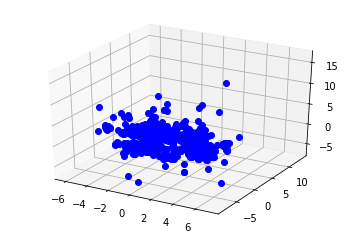

In [42]:
#df = df_all # 1st pass
#cluster_level = 'Root_Cluster'

#df = df_all[df_all["Root_Cluster"] == 1] # 2nd pass
#cluster_level = "Multi_Spike_Cluster"

#df = df_all[df_all["Multi_Spike_Cluster"] == 0] # Left of 2nd pass
#cluster_level = "Multi_Spike_0_Cluster"

#df = df_all[df_all["Multi_Spike_Cluster"] == 1] # Right of 2nd pass
#cluster_level = "Multi_Spike_1_Cluster"

from sklearn.preprocessing import StandardScaler, MinMaxScaler
x = StandardScaler().fit_transform(df.loc[:,prop_names].values)
x = DataFrame(x,columns=prop_names)
print('start dims', len(prop_names))
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full',n_components=0.95)
principalComponents = pca.fit_transform(x)
principalDf = DataFrame(data = principalComponents)
X = principalDf
print('post-pca dims', len(principalDf.columns))
from mpl_toolkits import mplot3d
plt.axes(projection='3d')
plt.plot(X[0],X[1], X[2],'bo')

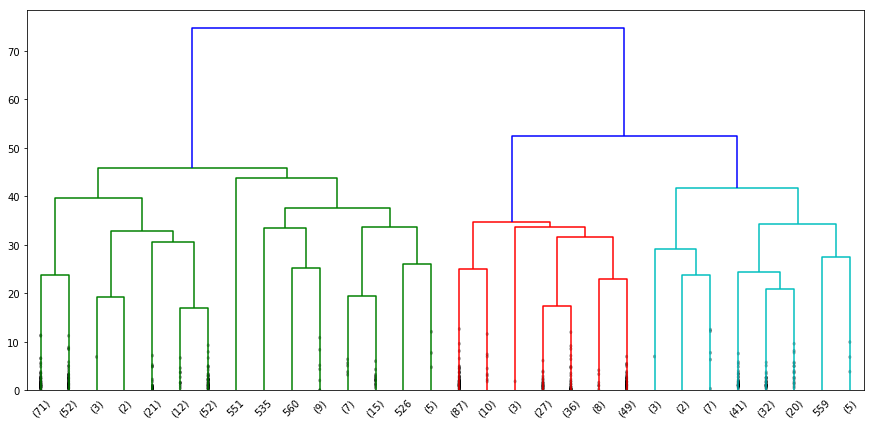

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'ward',optimal_ordering=False)

plt.figure(figsize=(15, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='acending',
            show_leaf_counts=True,
            truncate_mode='lastp',
            #p=5,
            show_contracted=True,
          )
plt.show()  


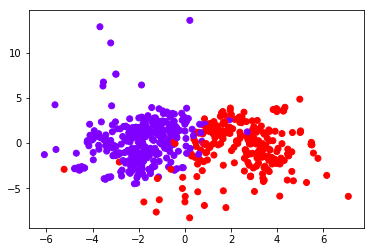

In [44]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 

plt.scatter(X[0],X[1], c=cluster.labels_, cmap='rainbow')  
plt.show()

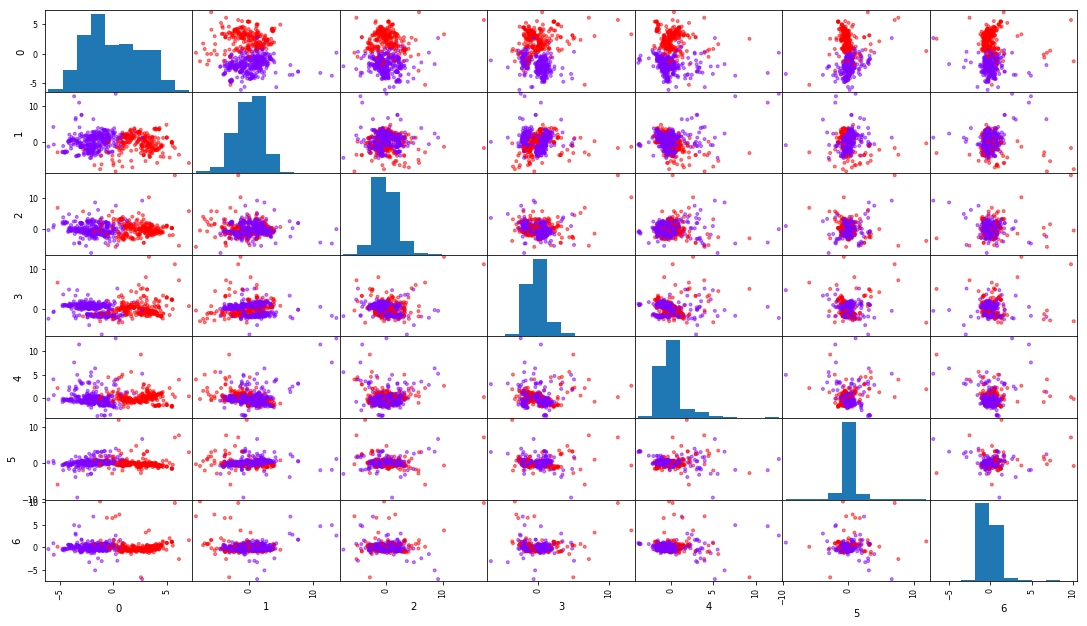

In [45]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(X.iloc[:, : 7],c=cluster.labels_, cmap='rainbow')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [46]:
# Set subset df cluster
df[cluster_level] = cluster.labels_

# Set main df cluster
df_all[cluster_level] = df[cluster_level]

df

,AP1Amplitude,AP2Amplitude,AP12AmplitudeDrop,AP12AmplitudeChangePercent,AP1SSAmplitudeChange,AP1WidthHalfHeight,AP2WidthHalfHeight,AP12HalfWidthChangePercent,AP1WidthPeakToTrough,AP2WidthPeakToTrough,AP1RateOfChangePeakToTrough,AP2RateOfChangePeakToTrough,AP12RateOfChangePeakToTroughPercentChange,AP1AHPDepth,AP2AHPDepth,AP12AHPDepthPercentChange,AP1DelayMean,AP2DelayMean,AP1DelaySD,AP2DelaySD,AP1DelayMeanStrongStim,AP2DelayMeanStrongStim,AP1DelaySDStrongStim,AP2DelaySDStrongStim,Burst1ISIMean,Burst1ISIMeanStrongStim,Burst1ISISD,Burst1ISISDStrongStim,InitialAccommodationMean,SSAccommodationMean,AccommodationRateToSS,AccommodationAtSSMean,AccommodationRateMeanAtSS,ISIMedian,ISICV,ISIBurstMeanChange,SpikeRateStrongStim,InputResistance,SteadyStateAPs,FFPassAbove,FFPassBelow,RampSpikes,Root_Cluster,Multi_Spike_Cluster,Multi_Spike_0_Cluster,Multi_Spike_1_Cluster
0,74.860976,72.470540,2.516925,3.330235,3.148978,-0.186330,-0.186330,0.000000e+00,0.993252,1.040277,3.928308,3.820188,4.600623,9.834584,9.170879,4.895605,2.036012,3.228826,0.0,0.0,1.153732,2.371178,0.0,0.0,2.806084,2.086293,0.000000e+00,0.0,-3.571429,-3.571429,-0.111433,-1.130060e+01,13.866022,2.905260,4.572826,5.331061,1.252763,3.019237,0.000000,29.367874,143.000000,3109.81,1,1.0,NaN,0
5,72.021610,72.400025,2.264009,3.187440,3.251157,-0.653926,-0.653926,-2.176908e-14,1.383791,1.381282,3.387776,3.401066,4.712989,13.492530,14.008195,4.971696,3.267285,3.777348,0.0,0.0,2.170196,2.865624,0.0,0.0,2.937043,2.291524,0.000000e+00,0.0,-20.000000,-20.000000,-0.069493,-9.664790e+01,76.560933,4.798390,1.421456,5.500789,2.862201,3.846362,0.000000,29.000000,35.967282,3087.63,1,1.0,NaN,0
7,78.188898,76.429996,2.464611,3.295885,3.187304,-1.609438,-1.660731,-5.263158e+00,1.795087,1.726332,3.080317,3.174158,4.790091,26.052869,29.398837,5.032348,2.329227,4.864761,0.0,0.0,1.467874,3.260018,0.0,0.0,4.807499,3.584352,2.842171e-14,0.0,-25.000000,0.000000,0.000000,-7.510980e+00,22.453540,4.849762,4.020941,5.329844,3.113515,2.410681,0.000000,29.000000,143.000000,3410.28,1,1.0,NaN,1
8,84.288880,80.881247,2.595824,3.360186,3.194321,-0.798508,-0.798508,0.000000e+00,1.515127,1.534714,3.464223,3.419922,4.658962,25.589417,26.742705,4.976433,2.664447,4.167595,0.0,0.0,1.867176,3.485539,0.0,0.0,5.052481,3.378270,2.842171e-14,0.0,-33.333333,-33.333333,-0.104664,-8.260158e+01,10.000000,5.579031,1.454424,6.509540,2.251292,7.029590,0.000000,57.663275,143.000000,3133.93,1,1.0,NaN,1
9,84.454780,81.181570,2.585748,3.354366,3.204179,-0.820981,-0.798508,2.325581e+00,1.504077,1.519513,3.483256,3.436656,4.656839,26.024756,26.214190,4.950018,2.646175,4.162003,0.0,0.0,1.851599,3.480009,0.0,0.0,5.059933,3.377417,2.842171e-14,0.0,-33.333333,-33.333333,-0.103985,-8.262564e+01,10.000000,5.578333,1.454142,6.519362,2.251292,7.050568,0.000000,54.999184,143.000000,3133.75,1,1.0,NaN,1
10,83.838360,80.624230,2.581287,3.352898,3.191561,-0.820981,-0.798508,2.325581e+00,1.528228,1.541159,3.447799,3.408985,4.664079,26.018081,26.666532,4.962438,2.679651,4.172539,0.0,0.0,1.877937,3.489208,0.0,0.0,5.052705,3.380484,2.842171e-14,0.0,-33.333333,-33.333333,-0.104569,-8.260676e+01,10.000000,5.580654,1.454353,6.507571,2.251292,7.023716,0.000000,54.266191,143.000000,3134.16,1,1.0,NaN,1
11,84.527707,80.747240,2.623252,3.374997,3.206648,-0.776529,-0.798508,-2.222222e+00,1.477049,1.495149,3.516676,3.468174,4.655108,25.904764,26.783009,4.968700,2.635480,4.164337,0.0,0.0,1.850028,3.478467,0.0,0.0,5.081466,3.380484,2.842171e-14,0.0,-33.333333,-33.333333,-0.101853,-8.270775e+01,10.000000,5.587324,1.453020,6.534777,2.251292,7.059631,0.000000,61.126766,143.000000,3133.69,1,1.0,NaN,1
12,84.403580,81.308640,2.572226,3.347043,3.197996,-0.820981,-0.798508,2.325581e+00,1.523880,1.543298,3.454423,3.406172,4.655251,25.594137,25.961872,4.955026,2.678965,4.172848,0.0,0.0,1.877937,3.489819,0.0,0.0,5.053152,3.381845,2.842171e-14,0.0,-33.333333,-33.333333,-0.104526,-8.260120e+01,10.000000,5.580993,1.454411,6.507370,2.251292,7.023716,0.000000,60.620813,143.000000,3

In [47]:
pca_normed = MinMaxScaler(feature_range=(-1,1)).fit_transform(df_all.values[:,:-4])
pca_normed = DataFrame(pca_normed)

pca_normed['Root_Cluster'] = df_all['Root_Cluster']
pca_normed['Multi_Spike_Cluster'] = df_all['Multi_Spike_Cluster']
pca_normed['Multi_Spike_0_Cluster'] = df_all['Multi_Spike_0_Cluster']
pca_normed['Multi_Spike_1_Cluster'] = df_all['Multi_Spike_1_Cluster']

pca_normed.to_csv('pca_normed.csv')

pca_normed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,Root_Cluster,Multi_Spike_Cluster,Multi_Spike_0_Cluster,Multi_Spike_1_Cluster
0,0.490856,0.472741,-0.300502,-0.185614,-0.322248,-0.034976,0.331789,0.021898,-0.558601,-0.533945,-0.152245,-0.150675,-0.062374,-0.592250,-0.761678,-0.312500,-0.803723,-0.748599,-1.0,-1.00,-0.897794,-0.829633,-1.0,-1.0,-0.606485,-0.787429,-1.0,-1.0,-0.035714,-0.035714,0.103526,0.802569,-0.999999,-0.632242,-0.067232,-0.426012,-0.578486,-0.763414,-1.000000,-0.993546,1.000000,-0.531962,1,1.0,NaN,0.0
1,-0.145843,-1.000000,0.562342,1.000000,0.486461,-0.368776,-1.000000,-1.000000,-0.748776,-1.000000,-0.130418,-1.000000,-1.000000,-0.789181,-0.944487,-0.629482,-1.000000,1.000000,-1.0,-1.00,-1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-0.747087,-0.999876,1.000000,-1.000000,-0.458584,-0.863574,1.000000,-1.000000,-1.000000,1.000000,-1.000000,0,NaN,NaN,NaN
2,-1.000000,-1.000000,-0.427934,-0.281772,-0.401645,-1.000000,-1.000000,0.021898,-1.000000,-1.000000,-1.000000,-1.000000,-0.021631,-0.772415,-0.944487,-0.299444,1.000000,1.000000,-1.0,-1.00,1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,-1.0,-1.0,0.000000,0.000000,-1.000000,-0.747087,-0.999876,1.000000,-1.000000,-0.458584,-1.000000,0.301539,-1.000000,-1.000000,1.000000,0.379498,0,NaN,NaN,NaN
3,-1.000000,-1.000000,-0.427934,-0.281772,-0.401645,-1.000000,-1.000000,0.021898,-1.000000,-1.000000,-1.000000,-1.000000,-0.021631,-0.772415,-0.944487,-0.299444,1.000000,1.000000,-1.0,-1.00,1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,-1.0,-1.0,0.000000,0.000000,-1.000000,-0.747087,-0.999876,1.000000,-1.000000,-0.458584,-1.000000,0.301539,-0.345768,-1.000000,1.000000,0.379498,0,NaN,NaN,NaN
4,-1.000000,-1.000000,-0.427934,-0.281772,-0.401645,-1.000000,-1.000000,0.021898,-1.000000,-1.000000,-1.000000,-1.000000,-0.021631,-0.772415,-0.944487,-0.299444,1.000000,1.000000,-1.0,-1.00,1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,-1.0,-1.0,0.000000,0.000000,-1.000000,-0.747087,-0.999876,1.000000,-1.000000,-0.458584,-1.000000,0.301539,-1.000000,-1.000000,1.000000,0.379498,0,NaN,NaN,NaN
5,0.434310,0.471308,-0.450869,-0.298775,-0.240428,-0.137094,0.190861,0.021898,-0.385047,-0.381171,-0.268896,-0.243856,-0.016527,-0.525238,-0.665252,-0.292325,-0.404729,-0.529400,-1.0,-1.00,-0.598625,-0.656713,-1.0,-1.0,-0.562621,-0.720924,-1.0,-1.0,-0.200000,-0.200000,0.155613,-0.688523,-0.999995,0.025568,-0.710051,-0.291801,-0.036962,-0.490357,-1.000000,-1.000000,-0.877767,-0.542657,1,1.0,NaN,0.0
6,-1.000000,-1.000000,-0.427934,-0.281772,-0.401645,-1.000000,-1.000000,0.021898,-1.000000,-1.000000,-1.000000,-1.000000,-0.021631,-0.772415,-0.944487,-0.299444,1.000000,1.000000,-1.0,-1.00,1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,-1.0,-1.0,0.000000,0.000000,-1.000000,-0.747087,-0.999876,1.000000,-1.000000,-0.458584,-1.000000,0.301539,-0.589487,-1.000000,1.000000,0.379498,0,NaN,NaN,NaN
7,0.557131,0.553205,-0.331604,-0.212835,-0.291558,-0.345767,-0.112579,-0.031886,-0.202268,-0.226586,-0.335248,-0.294304,0.014931,-0.295139,-0.358460,-0.276244,-0.708706,-0.094851,-1.0,-1.00,-0.805335,-0.518783,-1.0,-1.0,0.063868,-0.301983,-0.5,-1.0,-0.250000,0.000000,0.241917,0.868777,-0.999999,0.043418,-0.179806,-0.426973,0.047597,-0.964314,-1.000000,-1.000000,1.000000,-0.387074,1,1.0,NaN,1.0
8,0.678613,0.643663,-0.253593,-0.161878,-0.285939,-0.168669,0.147285,0.021898,-0.326681,-0.312432,-0.252398,-0.239664,-0.038571,-0.303629,-0.411407,-0.291069,-0.600078,-0.373451,-1.0,-1.00,-0.687811,-0.439912,-1.0,-1.0,0.145922,-0.368764,-0.5,-1.0,-0.333333,-0.333333,0.111933,-0.443122,-0.999999,0.296819,-0.703326,0.505855,-0.242514,0.560515,-1.000000,-0.497136,1.000000,-0.520331,1,1.0,NaN,1.0
9,0.681916,0.649766,-0.259584,-0.166491,-0.278045,-0.173577,0.147285,0.045663,-0.331592,-0.319242,-0.248291,-0.235944,-0.039437,-0.295654,-0.421942,-0.298073,-0.605999,-0.375686,-1.0,-1.00,-0.692395,-0.441846,-1.0,-1.0,0.148418,-0.369040,

In [ ]:
df.to_csv('transformed.csv')

In [ ]:
df_spikers = df[df['PCA1_Cluster'] == 'multi-spikers']

from sklearn.preprocessing import StandardScaler
x_spikers = StandardScaler().fit_transform(df_spikers.loc[:,prop_names].values)
x_spikers = DataFrame(x_spikers,columns=prop_names)

from sklearn.decomposition import PCA
pca_spikers = PCA(svd_solver='full',n_components=0.9)
principalComponents_spikers = pca.fit_transform(x_spikers)
principalDf_spikers = DataFrame(data = principalComponents_spikers)
X_spikers = principalDf_spikers


plt.plot(X_spikers[0],X_spikers[1],'bo')

In [ ]:
%matplotlib notebook
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked_spikers = linkage(X_spikers, 'ward')

plt.figure(figsize=(15, 7))  
dendrogram(linked_spikers,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_spikers) 

plt.figure(figsize=(15, 7))  
plt.scatter(X_spikers[0],X_spikers[1], c=cluster.labels_, cmap='rainbow', s=10)  

In [ ]:
df_spikers['PCA2_Clusters'] = cluster.labels_

In [ ]:
cells[13].Model_ID

In [ ]:
for i, c in enumerate(df_spikers['PCA2_Clusters']):
    print(df_spikers['PCA2_Clusters'].index[i],c,cells[df_spikers['PCA2_Clusters'].index[i]].Model_ID)

In [ ]:
df_spikers['PCA2_Clusters'].index